### **Calculating physico-chemical properties**

Currently available calculations: https://apidocs.chemaxon.com/python_api/apidocs/chemaxon/calculations.html

In [1]:
from chemaxon import import_mol, logp, logd, pka, hlb

mol = import_mol('CC(=O)NC1=CC=C(O)C=C1') # paracetamol

print('logP:        ', logp(mol))
print('logD[pH 9.0]:', logd(mol, pH=9.0))
print('pKa:         ', pka(mol))
print('hlb:         ', hlb(mol))

logP:         0.91
logD[pH 9.0]: 0.78
pKa:          [atom: 8,  pka: 9.46 (ACIDIC)], [atom: 2,  pka: -4.36 (BASIC)], [atom: 8,  pka: -5.94 (BASIC)]
hlb:          14.14


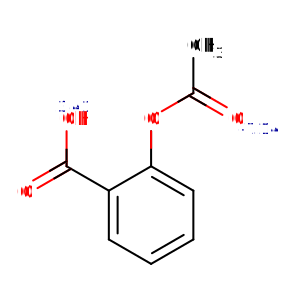

In [2]:
from chemaxon import import_mol, pka

mol = import_mol('aspirin')

pka_result = pka(mol)
pka_result.structure

### **Chemical Terms**

Please note that Chemaxon Python API **does not support** all available [Chemical Terms](https://docs.chemaxon.com/display/docs/chemical-terms_functions-by-categories.md) functions. Check the documentation for details.

In [3]:
from chemaxon import evaluate

print('Formula:   ', evaluate(mol, "formula()"))
print('Atom count:', evaluate(mol, "atomCount()"))
print('Ring count:', evaluate(mol, "ringCount()"))
print('Fsp3:      ', evaluate(mol, "fsp3()"))
print('logP:      ', evaluate(mol, "logP()"))
print('logS:      ', evaluate(mol, "logS()"))

Formula:    C9H8O4
Atom count: 21
Ring count: 1
Fsp3:       0.1111111111111111
logP:       1.238089698333333
logS:       -1.8489350401969602


#### **Tautomer region of warfarin**

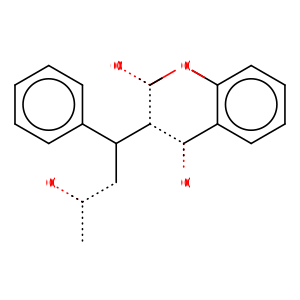

In [4]:
warfarin = import_mol("warfarin")
import_mol(evaluate(warfarin, "molFormat(genericTautomer(), 'smarts')"))

### **Calculating properties for a set of molecules**

In [5]:
import sys

!{sys.executable} -m pip install pandas matplotlib

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
...
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)


In [6]:
import pandas

mols = pandas.read_table('nci1000.smiles', names=['SMILES', 'NCI_ID'])
mols

,SMILES,NCI_ID
0,CC1=CC(=O)C=CC1=O,1
1,S(SC1=NC2=CC=CC=C2S1)C3=NC4=C(S3)C=CC=C4,2
2,OC1=C(Cl)C=C(C=C1[N+]([O-])=O)[N+]([O-])=O,3
3,[O-][N+](=O)C1=CNC(=N)S1,4
4,NC1=CC2=C(C=C1)C(=O)C3=C(C=CC=C3)C2=O,5
...,...,...
995,OC(=O)CN(CC(O)=O)CC1=CC=CC=C1,1003
996,CC(C)N(CC(O)=O)CC(O)=O,1004
997,C1=CC=C(C=C1)C=NC(N=CC2=CC=CC=C2)C3=CC=CC=C3,1005
998,CC(C)(C)C[C]1(C)NC(=O)NC1=O,1006


In [7]:
mols['LOGP'] = mols.apply(lambda row: round(logp(import_mol(row['SMILES'])), 2), axis = 'columns')
mols['LOGD[3.0]'] = mols.apply(lambda row: logd(import_mol(row['SMILES']), pH=3.0), axis = 'columns')
mols['LOGD[7.4]'] = mols.apply(lambda row: logd(import_mol(row['SMILES']), pH=7.4), axis = 'columns')
mols['LOGD[11.0]'] = mols.apply(lambda row: logd(import_mol(row['SMILES']), pH=11.0), axis = 'columns')
mols

,SMILES,NCI_ID,LOGP,LOGD[3.0],LOGD[7.4],LOGD[11.0]
0,CC1=CC(=O)C=CC1=O,1,1.42,1.42,1.42,1.42
1,S(SC1=NC2=CC=CC=C2S1)C3=NC4=C(S3)C=CC=C4,2,6.22,6.22,6.22,6.22
2,OC1=C(Cl)C=C(C=C1[N+]([O-])=O)[N+]([O-])=O,3,2.15,1.96,0.25,0.25
3,[O-][N+](=O)C1=CNC(=N)S1,4,-0.22,-1.69,-0.27,-0.33
4,NC1=CC2=C(C=C1)C(=O)C3=C(C=CC=C3)C2=O,5,2.09,2.04,2.09,2.09
...,...,...,...,...,...,...
995,OC(=O)CN(CC(O)=O)CC1=CC=CC=C1,1003,-2.08,-2.08,-5.27,-6.17
996,CC(C)N(CC(O)=O)CC(O)=O,1004,-3.19,-3.96,-6.34,-6.35
997,C1=CC=C(C=C1)C=NC(N=CC2=CC=CC=C2)C3=CC=CC=C3,1005,5.72,5.72,5.72,5.72
998,CC(C)(C)C[C]1(C)NC(=O)NC1=O,1006,1.11,1.10,1.10,-0.05


array([[<Axes: title={'center': 'LOGP'}>,
        <Axes: title={'center': 'LOGD[3.0]'}>],
       [<Axes: title={'center': 'LOGD[7.4]'}>,
        <Axes: title={'center': 'LOGD[11.0]'}>]], dtype=object)

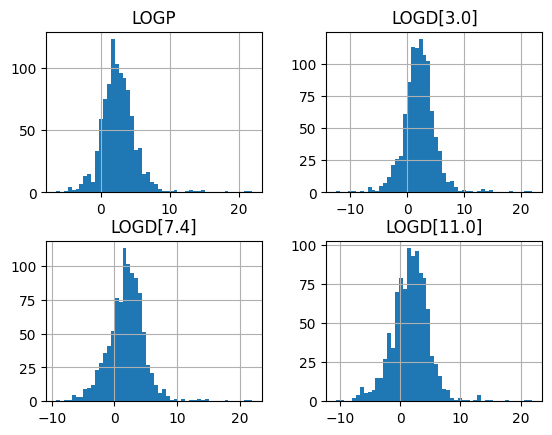

In [8]:
mols.hist(['LOGP', 'LOGD[3.0]', 'LOGD[7.4]', 'LOGD[11.0]'], bins=50)